<a href="https://colab.research.google.com/github/santoshdhalwalkar/ocrproject/blob/main/imgread.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive


In [ ]:
#import drive from google
from google.colab import drive

In [ ]:
# mount the drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
!pip install opencv-python
!pip install pytesseract
!pip install boto3

In [ ]:
!pip install sagemaker

In [ ]:
import os
import cv2
import csv
import boto3
from sagemaker import get_execution_role
from sagemaker.processing import ProcessingInput, ProcessingOutput
from sagemaker.processing import ScriptProcessor
import pytesseract

In [ ]:
# Install necessary libraries
!pip install opencv-python
!pip install pytesseract

In [ ]:
!mkdir -p /content/drive/MyDrive/model
!wget -P /content/drive/MyDrive/model https://pjreddie.com/media/files/yolov3.weights
!wget -P /content/drive/MyDrive/model https://github.com/pjreddie/darknet/blob/master/cfg/yolov3.cfg?raw=true -O /content/drive/MyDrive/model/yolov3.cfg
!wget -P /content/drive/MyDrive/model https://github.com/pjreddie/darknet/blob/master/data/coco.names?raw=true -O /content/drive/MyDrive/model/coco.names

--2025-03-11 15:50:38--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 162.0.215.52
Connecting to pjreddie.com (pjreddie.com)|162.0.215.52|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘/content/drive/MyDrive/model/yolov3.weights.4’

yolov3.weights.4    100%[===================>] 236.52M  18.0MB/s    in 11s     

2025-03-11 15:50:49 (22.0 MB/s) - ‘/content/drive/MyDrive/model/yolov3.weights.4’ saved [248007048/248007048]

--2025-03-11 15:50:49--  https://github.com/pjreddie/darknet/blob/master/cfg/yolov3.cfg?raw=true
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/pjreddie/darknet/raw/refs/heads/master/cfg/yolov3.cfg [following]
--2025-03-11 15:50:49--  https://github.com/pjreddie/darknet/raw/refs/heads/master/cfg

In [ ]:
!sudo apt install tesseract-ocr
!sudo apt install libtesseract-dev

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libtesseract-dev is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.


In [ ]:
from matplotlib import pyplot as plt

In [ ]:
# Path to the folder containing images
IMAGE_FOLDER = '/content/drive/MyDrive/ocrimages'

In [ ]:
# YOLOv3 Configuration
YOLO_WEIGHTS = '/content/drive/MyDrive/model/yolov3.weights'
YOLO_CONFIG = '/content/drive/MyDrive/model/yolov3.cfg'
YOLO_NAMES = '/content/drive/MyDrive/model/coco.names'

In [ ]:
# Load YOLOv3 model
net = cv2.dnn.readNet(YOLO_WEIGHTS, YOLO_CONFIG)

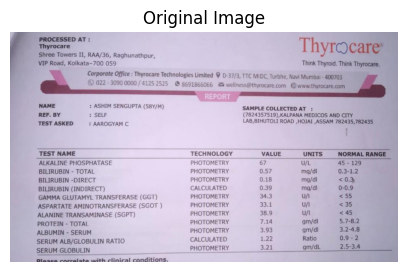

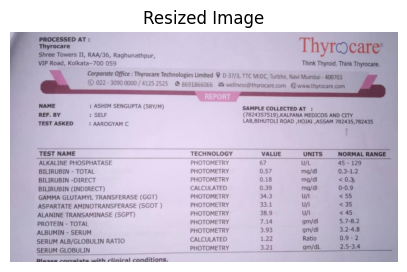

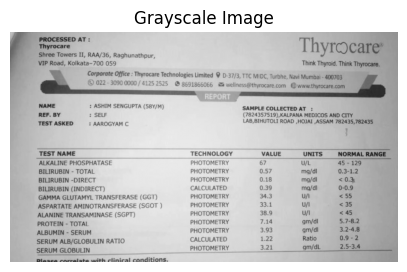

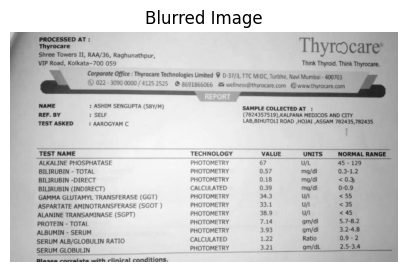

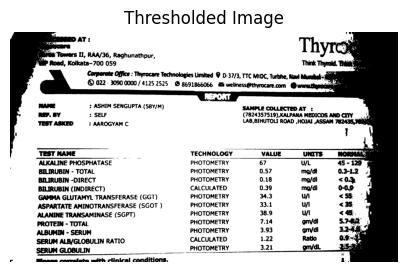

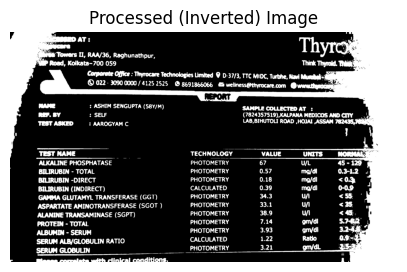

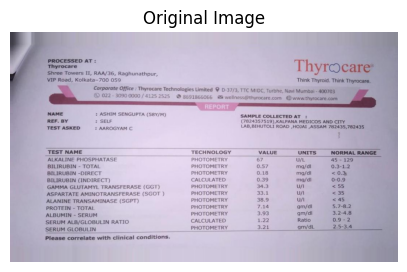

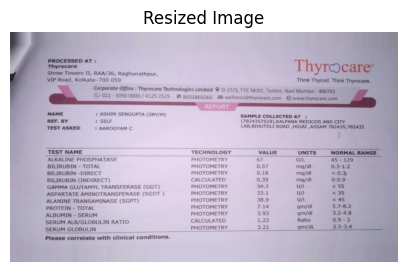

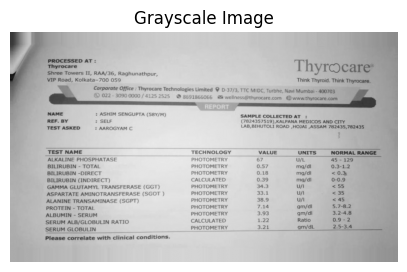

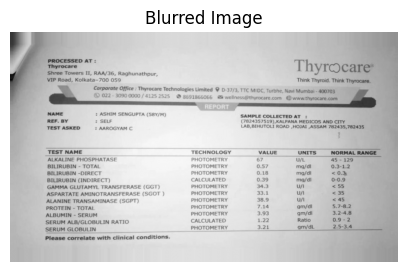

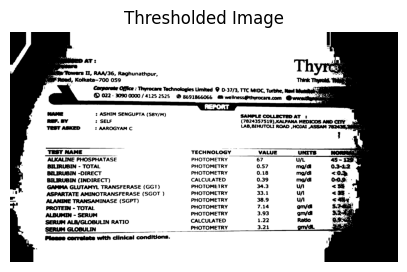

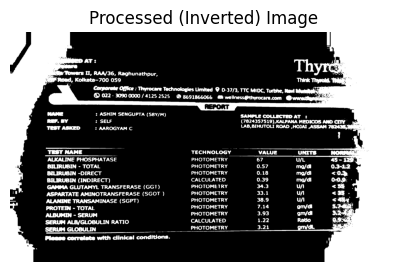

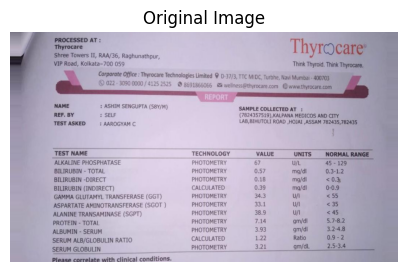

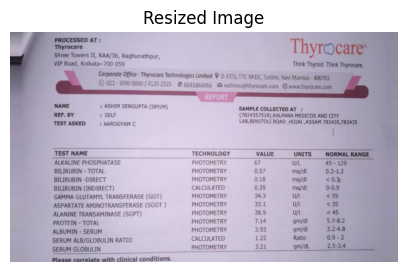

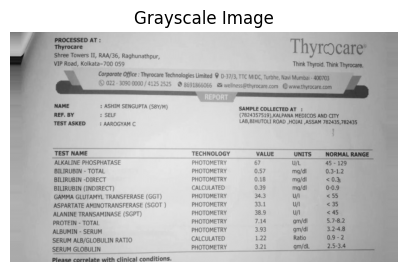

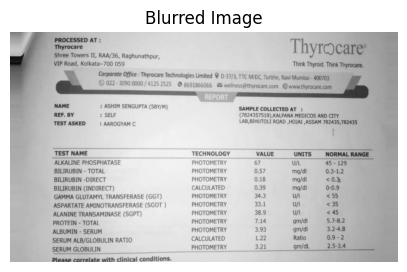

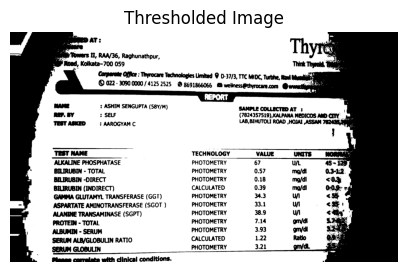

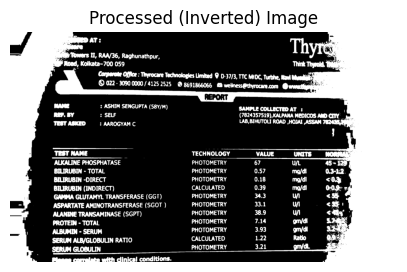

Output saved to: /content/drive/MyDrive/output1.csv


In [ ]:
# Function to visualize images at different preprocessing stages
def show_image(title, img, cmap=None):
    plt.figure(figsize=(5, 5))
    plt.title(title)
    plt.imshow(img, cmap=cmap)
    plt.axis('off')
    plt.show()

# Function to preprocess image: resizing, converting to grayscale, applying Gaussian blur, and thresholding
def preprocess_image(image):
    # Resize the image to enhance text clarity
    resized = cv2.resize(image, None, fx=3, fy=3)
    # Convert the image to grayscale
    gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
    # Apply Gaussian blur to reduce noise
    blur = cv2.GaussianBlur(gray, (5, 5), 0)
    # Apply Otsu's thresholding for better text segmentation
    _, thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    # Invert colors to make text white on black background if needed
    processed = cv2.bitwise_not(thresh)

    # Visualizing each step
    show_image('Resized Image', cv2.cvtColor(resized, cv2.COLOR_BGR2RGB))
    show_image('Grayscale Image', gray, cmap='gray')
    show_image('Blurred Image', blur, cmap='gray')
    show_image('Thresholded Image', thresh, cmap='gray')
    show_image('Processed (Inverted) Image', processed, cmap='gray')

    return processed

# Function to extract text directly from the entire image
def extract_text(image_path):
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error: Could not load image from {image_path}. Please check the path and file.")
        return ""
    show_image('Original Image', cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    processed = preprocess_image(image)
    text = pytesseract.image_to_string(processed)
    return text

# Function to save text to a CSV file with image names
def save_to_csv(text_data, image_names, output_file):
    with open(output_file, 'w', newline='') as f:
        writer = csv.writer(f)
        writer.writerow(['Image_Name', 'Extracted_Text'])
        for image_name, text in zip(image_names, text_data):
            writer.writerow([image_name, text])

# Main workflow
def main(image_names):
    output_file = os.path.expanduser('/content/drive/MyDrive/output1.csv')
    all_text_data = []
    for image_name in image_names:
        image_path = os.path.join(IMAGE_FOLDER, image_name)
        text = extract_text(image_path)
        all_text_data.append(text)
    save_to_csv(all_text_data, image_names, output_file)
    print(f"Output saved to: {output_file}")

if __name__ == '__main__':
    image_names = [
        '/content/drive/MyDrive/ocrimages/thyrocare_0_1861.jpg',
        '/content/drive/MyDrive/ocrimages/thyrocare_0_2841.jpg',
        '/content/drive/MyDrive/ocrimages/thyrocare_0_657.jpg'
    ]
    main(image_names)

In [ ]:
# Function to preprocess image
def preprocess_image(image):
    image = cv2.resize(image, None, fx=3, fy=3)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (5, 5), 0)
    _, thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    processed = cv2.bitwise_not(thresh)
    return processed

# Function to extract text directly from the entire image
def extract_text(image_path):
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error: Could not load image from {image_path}. Please check the path and file.")
        return ""
    processed = preprocess_image(image)
    text = pytesseract.image_to_string(processed)
    return text

# Function to save text to a CSV file with image names
def save_to_csv(text_data, image_names, output_file):
    with open(output_file, 'w', newline='') as f:
        writer = csv.writer(f)
        writer.writerow(['Image_Name', 'Extracted_Text'])
        for image_name, text in zip(image_names, text_data):
            writer.writerow([image_name, text])

# Main workflow
def main(image_names):
    output_file = os.path.expanduser('/content/drive/MyDrive/output1.csv')  # Save on desktop
    all_text_data = []
    for image_name in image_names:
        image_path = os.path.join(IMAGE_FOLDER, image_name)
        text = extract_text(image_path)
        all_text_data.append(text)
    save_to_csv(all_text_data, image_names, output_file)
    print(f"Output saved to: {output_file}")


if __name__ == '__main__':
    image_names = [
        '/content/drive/MyDrive/ocrimages/thyrocare_0_1861.jpg',
        '/content/drive/MyDrive/ocrimages/thyrocare_0_2841.jpg',
        '/content/drive/MyDrive/ocrimages/thyrocare_0_657.jpg'
    ]
    main(image_names)




Output saved to: /content/drive/MyDrive/output1.csv


In [ ]:
# Function to preprocess image
def preprocess_image(image):
    image = cv2.resize(image, None, fx=3, fy=3)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (5, 5), 0)
    _, thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    processed = cv2.bitwise_not(thresh)
    return processed

# Function to extract text directly from the entire image
def extract_text(image_path):
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error: Could not load image from {image_path}. Please check the path and file.")
        return ""
    processed = preprocess_image(image)
    text = pytesseract.image_to_string(processed)
    return text

# Function to save text to a CSV file
def save_to_csv(text_data, output_file):
    with open(output_file, 'w', newline='', encoding='utf-8') as f:
        writer = csv.writer(f)
        writer.writerow(['Extracted_Text'])
        for line in text_data:
            writer.writerow([line])

# Main workflow
def main(image_names):
    # Changed to a path accessible in Colab
    output_file = '/content/drive/MyDrive/output.csv'
    all_text_data = []
    for image_name in image_names:
        image_path = image_name # image_names already contain full paths
        text = extract_text(image_path)
        all_text_data.append(text)
    save_to_csv(all_text_data, output_file)
    print(f"Output saved to: {output_file}")

if __name__ == '__main__':
    image_names = [
        '/content/drive/MyDrive/ocrimages/thyrocare_0_1861.jpg',
        '/content/drive/MyDrive/ocrimages/thyrocare_0_2841.jpg',
        '/content/drive/MyDrive/ocrimages/thyrocare_0_657.jpg'
    ]
    main(image_names)




Output saved to: /content/drive/MyDrive/output.csv
